In [1]:
# Data Handling
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import torch
import math

# Data Visualization
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
%matplotlib inline

# Pattern Matching
import re

# ML Models
from sklearn.tree import DecisionTreeClassifier
import torch.nn as nn 
import torch.functional as F

# Model Evaluation Metrices 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv("/Users/kishore-pt5635/Documents/GitHub/MlAlgorithmsImplemantation/TabularData/mushrooms.csv", index_col=False)

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.shape

(8124, 23)

In [5]:
# Renaming Columns

columns = list(data.columns)

NewColumnNames = {}

for col in columns:
    regex = "-"
    pattern = re.findall(regex, col)
    if len(pattern) != 0:
        NewColumnNames[col] = col.replace("-", "")

In [6]:
data = data.rename(columns = NewColumnNames)
data.head()

,class,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,...,stalksurfacebelowring,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
# Dependant and independent feature split 

X = data.drop(columns=["class"])
y = data["class"]

In [8]:
# get the unique value of columns for encoding

for col in data.columns:
    print(f"{col} --> {len(data[col].unique())}")

class --> 2
capshape --> 6
capsurface --> 4
capcolor --> 10
bruises --> 2
odor --> 9
gillattachment --> 2
gillspacing --> 2
gillsize --> 2
gillcolor --> 12
stalkshape --> 2
stalkroot --> 5
stalksurfaceabovering --> 4
stalksurfacebelowring --> 4
stalkcolorabovering --> 9
stalkcolorbelowring --> 9
veiltype --> 1
veilcolor --> 4
ringnumber --> 3
ringtype --> 5
sporeprintcolor --> 9
population --> 6
habitat --> 7


In [9]:
# Encoding the features using Label Encoder

encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype is np.dtype("object"):
        X[col] = encoder.fit_transform(X[col])

X.head()

,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,...,stalksurfacebelowring,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [10]:
for col in X.columns:
    print(f"{col} --> {X[col].unique()}")

capshape --> [5 0 4 2 3 1]
capsurface --> [2 3 0 1]
capcolor --> [4 9 8 3 2 5 0 7 1 6]
bruises --> [1 0]
odor --> [6 0 3 5 2 1 8 7 4]
gillattachment --> [1 0]
gillspacing --> [0 1]
gillsize --> [1 0]
gillcolor --> [ 4  5  2  7 10  3  9  1  0  8 11  6]
stalkshape --> [0 1]
stalkroot --> [3 2 1 4 0]
stalksurfaceabovering --> [2 0 1 3]
stalksurfacebelowring --> [2 0 3 1]
stalkcolorabovering --> [7 3 6 4 0 2 5 1 8]
stalkcolorbelowring --> [7 6 3 0 4 2 8 5 1]
veiltype --> [0]
veilcolor --> [2 0 1 3]
ringnumber --> [1 2 0]
ringtype --> [4 0 2 1 3]
sporeprintcolor --> [2 3 6 1 7 5 4 8 0]
population --> [3 2 0 4 5 1]
habitat --> [5 1 3 0 4 6 2]


In [11]:
scalar = StandardScaler()

for col in X.columns:
    X[col] = scalar.fit_transform(np.array(X[col]).reshape(-1, 1))

X.head()

,capshape,capsurface,capcolor,bruises,odor,gillattachment,gillspacing,gillsize,gillcolor,stalkshape,...,stalksurfacebelowring,stalkcolorabovering,stalkcolorbelowring,veiltype,veilcolor,ringnumber,ringtype,sporeprintcolor,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730


In [13]:
X.shape

(8124, 22)

In [15]:
pca_22 = PCA(n_components=22, random_state=2020)
X_pca_22 = pca_22.fit_transform(X)
print(X_pca_22.shape)
print(f"variance explained by all 22 components ::: {sum(pca_22.explained_variance_ratio_) :.2%}")

(8124, 22)
variance explained by all 22 components ::: 100.00%


In [16]:
pca_22.explained_variance_ratio_

array([1.84458684e-01, 1.23955899e-01, 1.14306801e-01, 1.03165737e-01,
       8.10867705e-02, 6.64182876e-02, 4.66039611e-02, 4.53247460e-02,
       3.66638866e-02, 3.38886068e-02, 2.74993066e-02, 2.58294323e-02,
       2.42651684e-02, 2.27216831e-02, 1.83057085e-02, 1.48185678e-02,
       1.04106068e-02, 7.59501185e-03, 6.26216657e-03, 3.48525415e-03,
       2.93371356e-03, 7.37554122e-37])

In [17]:
np.cumsum(pca_22.explained_variance_ratio_ * 100)

array([ 18.44586841,  30.84145833,  42.27213845,  52.58871218,
        60.69738923,  67.339218  ,  71.99961411,  76.53208871,
        80.19847737,  83.58733805,  86.33726871,  88.92021194,
        91.34672878,  93.61889709,  95.44946793,  96.93132471,
        97.97238539,  98.73188657,  99.35810323,  99.70662864,
       100.        , 100.        ])

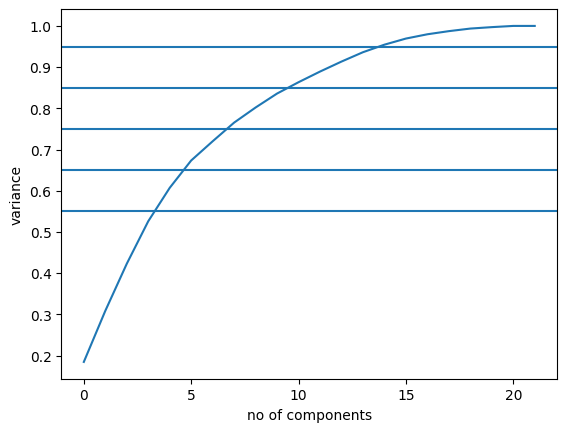

In [18]:
plt.plot(np.cumsum(pca_22.explained_variance_ratio_))
plt.xlabel("no of components")
plt.ylabel("variance")
plt.axhline(0.55)
plt.axhline(0.65)
plt.axhline(0.75)
plt.axhline(0.85)
plt.axhline(0.95)
plt.show()

In [19]:
pca_95 = PCA(n_components=0.95, random_state=2020)
X_pca_95 = pca_95.fit_transform(X)
print(X_pca_95.shape)
print(f"variance explained by {X_pca_95.shape[1]} components ::: {sum(pca_95.explained_variance_ratio_) :.2%}")

(8124, 15)
variance explained by 15 components ::: 95.45%


In [20]:
columns = [f"PC{i}" for i in range(1, X_pca_95.shape[1] + 1)]

In [21]:
df_new = pd.DataFrame(X_pca_95, columns=columns)
df_new

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-0.574322,-0.975781,-1.221762,0.185505,-1.451920,-1.538255,1.206300,1.545333,1.604984,0.405963,-0.690598,0.821627,0.080134,0.611855,-0.519966
1,-2.282102,0.279066,-1.200497,0.272056,-1.501531,-1.486986,1.082778,-0.340684,-0.661795,-0.158524,0.194346,-1.387830,-0.185504,-0.916553,-0.113078
2,-1.858036,-0.270972,-1.372371,1.055963,-1.810316,-0.874188,-1.768193,-0.286344,0.674741,0.339317,-0.293566,-0.511113,-0.033061,-0.519470,0.016525
3,-0.884780,-0.756468,-1.342068,0.370162,-2.111239,-2.110207,1.089952,1.243782,0.709039,0.478215,-1.285118,1.213600,0.434106,0.025716,-0.059661
4,0.689613,1.239262,-3.113237,0.814721,1.541685,-0.555917,0.585614,1.598763,-0.851453,1.436707,-0.015359,-1.260035,-0.682285,0.517256,-0.514080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-2.244846,-0.918550,2.528736,6.454448,2.787473,-1.331338,0.279874,0.608317,-0.045671,-0.306721,-0.217630,-0.020337,-0.158988,0.172495,0.578367
8120,-2.538760,-1.671721,4.324498,7.525921,3.974776,-2.180670,1.672122,0.209774,0.240103,-1.534567,-0.394144,0.902619,0.297831,0.137499,-0.213379
8121,-1.621516,-0.757537,2.733580,6.453626,2.478209,-1.573928,-0.323965,0.299329,0.205339,-0.187161,-0.264708,-0.659029,-0.149918,-0.182540,-0.519613
8122,3.670606,-1.032774,0.168460,-0.146535,-0.153971,-0.456976,-0.335280,-0.190521,-0.194496,-0.158677,-1.404525,0.238808,0.007232,-0.004265,-0.086884


In [22]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.2, shuffle=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6499, 15)
(1625, 15)
(6499,)
(1625,)


In [28]:
# Defining and fitting the decision tree classifier

classifier = DecisionTreeClassifier(criterion="gini", max_depth=6)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

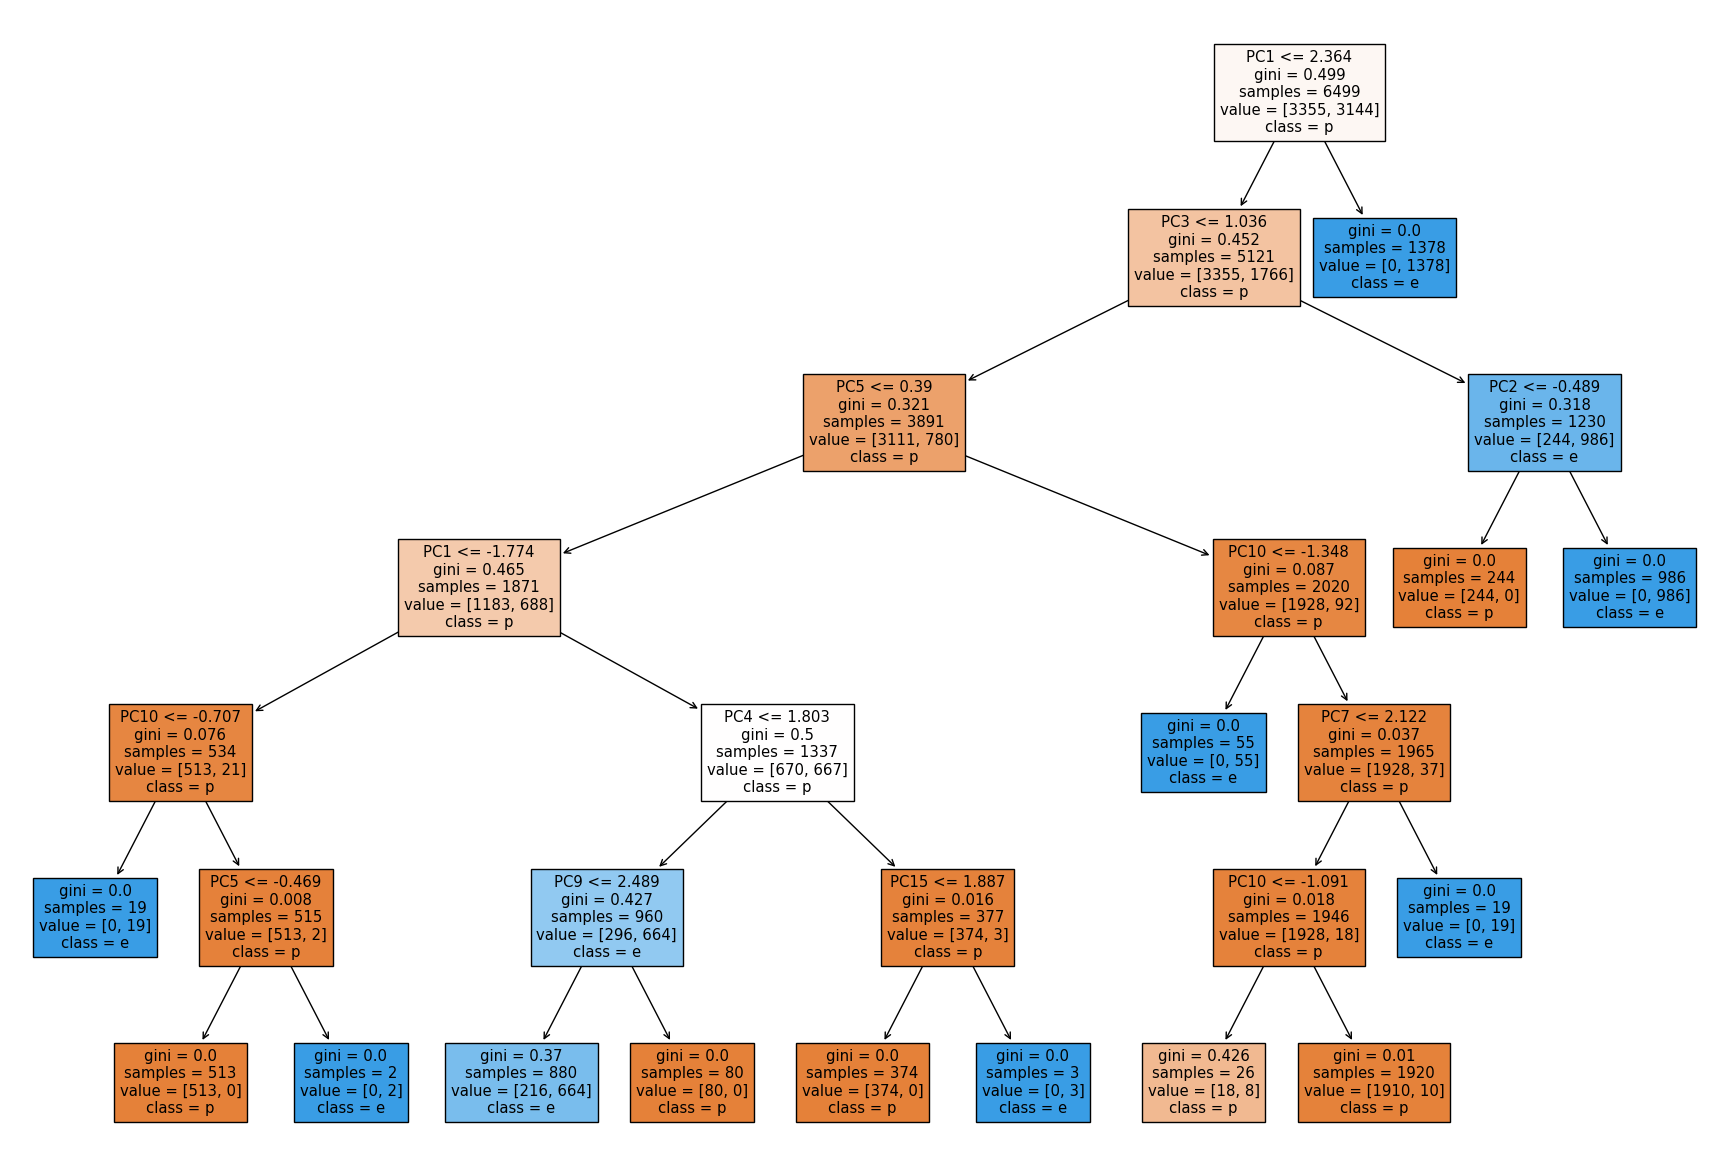

In [29]:
# Visualising the trained model

fig, ax = plt.subplots(figsize = (22, 15))
plot_tree(classifier, filled = True, feature_names = list(X_train.columns), class_names = list(y_train.unique()), ax = ax)
plt.show()

In [30]:
# prediting the output for test data using trained model

y_pred = classifier.predict(X_test)

In [31]:
# Evaluating the predictions 

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"accuracy --> {accuracy * 100}")

confusion_matrix(y_true=y_test, y_pred=y_pred)

accuracy --> 96.3076923076923


array([[798,  55],
       [  5, 767]])

In [32]:
# Evaluating the prediction for individual classes

poison_actual = list(y_test).count("p")
edible_actual = list(y_test).count("e")

poison_predicted = 0
edible_predicted = 0

y_test_ = list(y_test)
y_pred_ = list(y_pred)

for itr in range(len(y_test)):
    if y_test_[itr] == y_pred_[itr]:
        if y_pred_[itr] == "p":
            poison_predicted += 1
        else:
            edible_predicted += 1

print(f"accuracy of edible class ---> {(edible_predicted / edible_actual):.2%}")
print(f"accuracy of poison class ---> {(poison_predicted / poison_actual):.2%}")

accuracy of edible class ---> 93.55%
accuracy of poison class ---> 99.35%


In [33]:
Features_list = []
for col in df_new.columns:
    Features_list.append(df_new[col])

# Stacking all the features into array
Features = np.stack(Features_list, 1)

# converting the array of features to tensors
Features = torch.tensor(Features, dtype=torch.float32)
Features

tensor([[-0.5743, -0.9758, -1.2218,  ...,  0.0801,  0.6119, -0.5200],
        [-2.2821,  0.2791, -1.2005,  ..., -0.1855, -0.9166, -0.1131],
        [-1.8580, -0.2710, -1.3724,  ..., -0.0331, -0.5195,  0.0165],
        ...,
        [-1.6215, -0.7575,  2.7336,  ..., -0.1499, -0.1825, -0.5196],
        [ 3.6706, -1.0328,  0.1685,  ...,  0.0072, -0.0043, -0.0869],
        [-1.5752, -1.2286,  2.4472,  ..., -0.0851, -0.0803,  0.9161]])

In [34]:
# Label Encoding target column
y = encoder.fit_transform(y)

In [35]:
# converting target column to tensor
y = np.stack(y)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)
y

tensor([[1.],
        [0.],
        [0.],
        ...,
        [0.],
        [1.],
        [0.]])

In [36]:
print(Features.shape)
print(y.shape)

torch.Size([8124, 15])
torch.Size([8124, 1])


In [37]:
# Construct a Network

class Network(nn.Module):

    def __init__(self, inp_size, out_size, layers):
        super().__init__()

        self.layer_list = []

        for layer in layers:
            self.layer_list.append(nn.Linear(inp_size, layer))
            self.layer_list.append(nn.ReLU())
            inp_size = layer

        self.layer_list.append(nn.Linear(layers[-1], out_size))
        self.layer_list.append(nn.Sigmoid())
    
        self.Net = nn.Sequential(*self.layer_list)

    def forward(self, x):
        out = self.Net(x)
        return out

In [38]:
len(Features_list)

15

In [39]:
# Splitting the train and test samples

batch_size = 8124
test_size = int(batch_size * 0.15)

X_train = Features[:batch_size - test_size]
X_test = Features[batch_size - test_size:batch_size]

y_train = y[:batch_size - test_size]
y_test = y[batch_size - test_size : batch_size]

In [40]:
print(len(X_train))
print(len(X_test))

print(len(y_train))
print(len(y_test))

6906
1218
6906
1218


In [41]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

torch.Size([6906, 15])
torch.Size([1218, 15])
torch.Size([6906, 1])
torch.Size([1218, 1])


In [42]:
# initializing a model

torch.manual_seed(100)
model = Network(Features.shape[1], 2, [30, 20, 10])
model

Network(
  (Net): Sequential(
    (0): Linear(in_features=15, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=10, bias=True)
    (5): ReLU()
    (6): Linear(in_features=10, out_features=2, bias=True)
    (7): Sigmoid()
  )
)

In [43]:
# Defining a loss function
loss_function = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [44]:
# Defining the accuracy function
def compute_accuracy(y_pred, y_actual):
    predicted_labels = (y_pred >= 0.5).float()
    correct_predictions = (predicted_labels == y_actual).sum().item()
    total_predictions = y_actual.size(0)
    accuracy = correct_predictions / total_predictions
    return accuracy

In [45]:
# Model Training

epochs = 3000
final_losses = []

for itr in range(epochs):
    itr = itr + 1
    y_pred = model(X_train)
    y_pred = torch.max(y_pred, dim=1, keepdim=True)[0]
    loss = loss_function(y_pred, y_train)
    accuracy = compute_accuracy(y_pred, y_train)

    final_losses.append(loss)

    if itr % 10 == 1:
        print(f"Epoch Number --> {itr} ::::: accuracy ---> {accuracy} ::::: loss --> {loss}")
    
    optimizer.zero_grad
    loss.backward()
    optimizer.step()

Epoch Number --> 1 ::::: accuracy ---> 0.4613379669852302 ::::: loss --> 0.6980351209640503
Epoch Number --> 11 ::::: accuracy ---> 0.4613379669852302 ::::: loss --> 0.6912408471107483
Epoch Number --> 21 ::::: accuracy ---> 0.4626411815812337 ::::: loss --> 0.6829603910446167
Epoch Number --> 31 ::::: accuracy ---> 0.5152041702867072 ::::: loss --> 0.6698974967002869
Epoch Number --> 41 ::::: accuracy ---> 0.805676223573704 ::::: loss --> 0.6492576599121094
Epoch Number --> 51 ::::: accuracy ---> 0.8990732696206197 ::::: loss --> 0.6133591532707214
Epoch Number --> 61 ::::: accuracy ---> 0.9112366058499856 ::::: loss --> 0.5591772198677063
Epoch Number --> 71 ::::: accuracy ---> 0.9119606139588763 ::::: loss --> 0.4986172914505005
Epoch Number --> 81 ::::: accuracy ---> 0.9178974804517811 ::::: loss --> 0.4353037178516388
Epoch Number --> 91 ::::: accuracy ---> 0.9315088328989285 ::::: loss --> 0.3643379509449005
Epoch Number --> 101 ::::: accuracy ---> 0.9397625253402838 ::::: loss -

Text(0.5, 0, 'epoch')

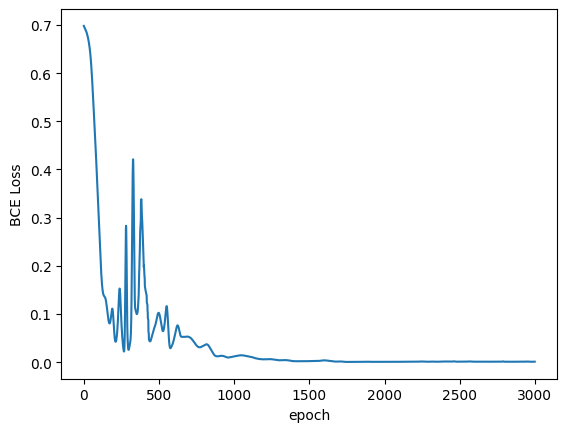

In [46]:
values = [t.item() for t in final_losses]

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), values)
plt.ylabel('BCE Loss')
plt.xlabel('epoch')

In [47]:
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = torch.max(y_pred, dim=1, keepdim=True)[0]
    loss = loss_function(y_pred, y_test)

print(f"loss ---> {loss}")
print(f"accuracy ---> {compute_accuracy(y_pred, y_test):.2%}")

loss ---> 3.628953456878662
accuracy ---> 95.73%
